# Multiclass Classification of Online Articles

## **Code part** of the case study on using NLP techniques alongside with Machine Learning Alrorithms to classify news into categories


## MODELS COMPARISON



In this notebook we will compare the result from all models for all cases.\
There is 2  cases one on imbalance data and other on balanced data:



### Metrics 


In the comparison of the Models we will focus on the well know like **accuracy** and used metrics present in the **Confusion Matrix** like **precision** and **recall** also the well know **f1 score** for counting also for incorrect predictions. And also the score of **kappa** to mesure the significance of the classification.


The **precision, recall, and f1 score** will be calculated for **macro, micro, weighted** **averages** for our multiclass classification.


First we need to get the files from drive

We will use the resulting prediction from our models to be the indicator of the performance.


## LOADING DATASET AND RESULT OF MODELS




In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


### LOAD DATASETS FOR ALL 2 CASES

In [4]:
 !mkdir DATASETS

# Download DATASET CASE 1
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
cases_file_id = '1Rb6mp-1U8HtYBK-A3vrTlBkzFT76u9cV' #-- Updated File ID for my zip
f = drive.CreateFile({'id': cases_file_id})
f.GetContentFile('DATASETS/case_1_dataset.csv')
#print('Downloaded content "{}"'.format(downloaded.GetContentString(encoding='cp862')))

mkdir: cannot create directory ‘DATASETS’: File exists


In [5]:

# Download DATASET CASE 2
#
cases_file_id = '1IaR7YFEk4NokLdDQZdL81K0484CR2aTj' #-- Updated File ID for my zip
f = drive.CreateFile({'id': cases_file_id})
f.GetContentFile('DATASETS/case_2_dataset.csv')
#print('Downloaded content "{}"'.format(downloaded.GetContentString(encoding='cp862')))

### LOAD ALL RESULTS



In [6]:

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
cases_file_id = '1r3WZHFDSdV3C0XNFnKQxtIyuEqX5edzV' #-- Updated File ID for my zip
downloaded = drive.CreateFile({'id': cases_file_id})
downloaded.GetContentFile('models_pred.zip')
#print('Downloaded content "{}"'.format(downloaded.GetContentString(encoding='cp862')))

In [7]:
! unzip models_pred.zip

Archive:  models_pred.zip
replace CASE_1/pred_class_case_1_split_1_nb.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### IMPORT NECESSARY LABRARIES



In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [9]:

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score


### DEFINE NECESSARY FUNCTIONS


In [10]:
def get_dataset_count(dataset):
  category_count = dataset['category'].value_counts()
  category_count = category_count.to_frame()
  category_count['class'] = category_count.index
  category_count.rename(columns={'category':'counts'}, inplace=True)
  return category_count

In [11]:
def get_scores_table(model_results):
    results = pd.read_csv(model_results)
    results = results[['pred', 'true']]

    micro_averages = [ x if isinstance(x, float) else x for x in precision_recall_fscore_support(results.pred, results.true, average='micro') ]

    Kappa = [cohen_kappa_score(results.pred, results.true)]*3
    report = classification_report(results.pred, results.true, output_dict=True)
    report = pd.DataFrame(report).transpose()

    report.loc['micro avg'] = micro_averages
    report.loc['kappa'] = [cohen_kappa_score(results.pred, results.true)]*4
    report['class'] = report.index
    
    return report

In [12]:
def plot_score(report, x, y, srt, out):
    if out >0:
      report = report[:-out]
    plt.figure(figsize=(16, 6))

    g = sns.barplot(x=x, y=y, data=report.sort_values(by=srt), palette = 'Set2')
    g.set_xticklabels(g.get_xticklabels(), rotation=90, )

In [13]:
def add_counts(result, counts):
    result['counts'] = counts['counts']
    return result

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_pairs_value(result_full):
    sns.set(rc={'figure.figsize':(300, 300)})

    p = sns.relplot(x= 'counts', y='f1-score', hue='class', data=result_full[:-5].sort_values(by='counts'), 
                palette='Paired_r', height=12,
                sizes= result_full['counts'][:-5].sort_values() );

    ax = p.axes[0,0]
    for idx,row in result_full[:-5].iterrows():
        x = row[5]
        y = row[2]
        text = row[4]
        ax.text(x+.05,y,text, horizontalalignment='left', rotation=45)
    plt.show()

In [15]:
def add_model(case, result, rows, model):
    result_new = result[-rows:].copy()
    result_new['model'] = [model]*result_new.shape[0]
    return case.append(result_new)

In [16]:
def add_model_to_case(case, result, out, model):
    result_new = result[-out:].transpose()
    result_new['model'] = model
    result_new = result_new[:1].reset_index(drop=True)

    return case.append(result_new)

# CASE 1 : IMBALANCED DATA


In the dataset there is more than 200k subjects, and as we do the classification using the **category** colums, we found as we see a big imbalance toward some categories.\
In this part we will compare the performence of the models, using all this dataset. Without touching on the imbalance.


In the case of imbalanced data, like this case it is preferable to use **micro veraginng** scores, and as we see

From we can see, ther is a lot of trends, so from the general view using **macro averaging** to treat all classes equally, we can see that we get a **accuracy** of **64** that it not that good, but not all bad.


For that score we generally assum lower **f_1_score**, but got also **65**. That mean 


We save these result to dataframe to later manipulations


## DATASET CASE 1


In [17]:
case_1_dataset = pd.read_csv('DATASETS/case_1_dataset.csv')
print(case_1_dataset.columns)
case_1_data_set_count = get_dataset_count(case_1_dataset)
case_1_data_set_count



Index(['Unnamed: 0', 'category', 'information', 'label'], dtype='object')


,counts,class
POLITICS,32739,POLITICS
ENTERTAINMENT,21233,ENTERTAINMENT
WELLNESS,17827,WELLNESS
PARENTS,12632,PARENTS
STYLE & BEAUTY,11903,STYLE & BEAUTY
TRAVEL,9887,TRAVEL
WORLD NEWS,8420,WORLD NEWS
FOOD & DRINK,8322,FOOD & DRINK
HEALTHY LIVING,6694,HEALTHY LIVING
QUEER VOICES,6314,QUEER VOICES


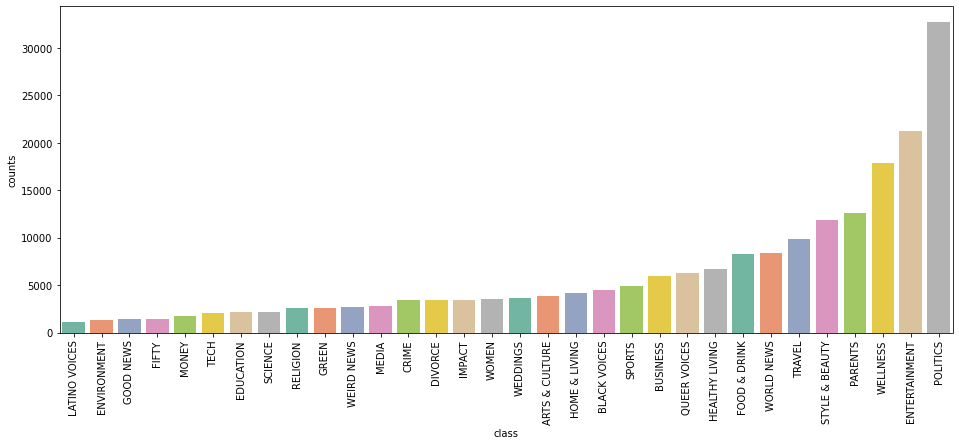

In [18]:
plot_score(case_1_data_set_count, 'class', 'counts', 'counts', 0)



We can see that our dataset for the 1 case, has 32 **category** and thers is a really big imballance in the categories, witch the ellement weill class based on it. We will see how the models will perform with this big imbalance in the dataset.

## LOGISTIC REGRESSION


We load the resul for the **logistic regression model**, then we will proced with the analysis.

In [19]:
case_1_result_log_reg = get_scores_table('CASE_1/pred_class_case_1_split_1_reg_log.csv')

In [20]:
case_1_result_log_reg

,precision,recall,f1-score,support,class
ARTS & CULTURE,0.462687,0.569730,0.510659,925.000000,ARTS & CULTURE
BLACK VOICES,0.393119,0.504225,0.441794,1065.000000,BLACK VOICES
BUSINESS,0.468347,0.484357,0.476218,1726.000000,BUSINESS
CRIME,0.527255,0.573276,0.549303,928.000000,CRIME
DIVORCE,0.692898,0.818594,0.750520,882.000000,DIVORCE
EDUCATION,0.383148,0.467054,0.420961,516.000000,EDUCATION
ENTERTAINMENT,0.753778,0.610870,0.674841,7838.000000,ENTERTAINMENT
ENVIRONMENT,0.289003,0.582474,0.386325,194.000000,ENVIRONMENT
FIFTY,0.183575,0.331878,0.236392,229.000000,FIFTY
FOOD & DRINK,0.779794,0.732946,0.755644,2580.000000,FOOD & DRINK


The score are in the last 5 rows in the dataset, we put all result in one dataset, so we don't have ot write a lot of code after


#### GENERAL VIEW

We gonna first look at the general scores of the models, like **accuracy, f1_score, and kappa** for the general score.


From we can see, ther is a lot of trends, we can see that we get a **accuracy** of **64** that it not that good, but not all bad.

For that score we generally assum lower **f_1_score**, but got also **value from 53 to 65**. witch is good.



We have 3 values of **f1 score** for **macro, micro, and weighted averages**.

The f1 score is the most praised score in quality of classifcation, In the case of multiclasses, we can get different value depanding on how we combine them. Whe know that **macro averaging**  will compute the metric
independently for each class and then take the average so it treat all classes equally. So if the model didn't classify the bigger classes, it will get  low f1 score in those classess, so it will lower the score for all the model.  we will see how it is the classification of each class.

One important aspect is that the data is imbalanced, so if the models is supposed to claasify bigger classes well, as it has more data, hunce should have bigger **f1 score for macro averaging** but this is nit the case , may be the cause is the presence of a lot of small not well classed categories. So because there is lot of small classes, and there is little data for them to to train the model, that may affect the score over all. A the end we have 32 categrory.

In the case of imbalanced data, like this case it is preferable to use **micro averaginng** scores, because this later will aggregate the contributions of all classes to compute the average metric. And that what we have, a better **f1 score** so the small classes still have effect, even in this imbalanced dataset. The score witch is arounf **60** seem to be good for a dataset of 32 classes of emperical attribution, the category of new is not that important thing that people to think a lot to choosr, so to have a value above 50 is good.


Now let's see if our model is **reliable**, using the **kappa** score, who calculate the aggrement between the model prediction and real classification, the bigger the score the more reliable hence, **performent** the module. In our we get a value of exactelly 60.087 round it to **61** with mean it get a **Substantial** score according to kappa scoring. and that mean the model is good.

#### INSIDER VIEW

We add the count by categories to our result dataframe so we case our the frequency by class afect the classification

In [21]:

#case_1_resucase_1_result_log_reglt_log_reg[:-5]['f1-score']
case_1_result_log_reg['counts'] = case_1_data_set_count['counts']
case_1_result_log_reg

,precision,recall,f1-score,support,class,counts
ARTS & CULTURE,0.462687,0.569730,0.510659,925.000000,ARTS & CULTURE,3878.0
BLACK VOICES,0.393119,0.504225,0.441794,1065.000000,BLACK VOICES,4528.0
BUSINESS,0.468347,0.484357,0.476218,1726.000000,BUSINESS,5937.0
CRIME,0.527255,0.573276,0.549303,928.000000,CRIME,3405.0
DIVORCE,0.692898,0.818594,0.750520,882.000000,DIVORCE,3426.0
EDUCATION,0.383148,0.467054,0.420961,516.000000,EDUCATION,2148.0
ENTERTAINMENT,0.753778,0.610870,0.674841,7838.000000,ENTERTAINMENT,21233.0
ENVIRONMENT,0.289003,0.582474,0.386325,194.000000,ENVIRONMENT,1323.0
FIFTY,0.183575,0.331878,0.236392,229.000000,FIFTY,1401.0
FOOD & DRINK,0.779794,0.732946,0.755644,2580.000000,FOOD & DRINK,8322.0


Let's see if there is a correlation between the size of the class and it's **f1 score**

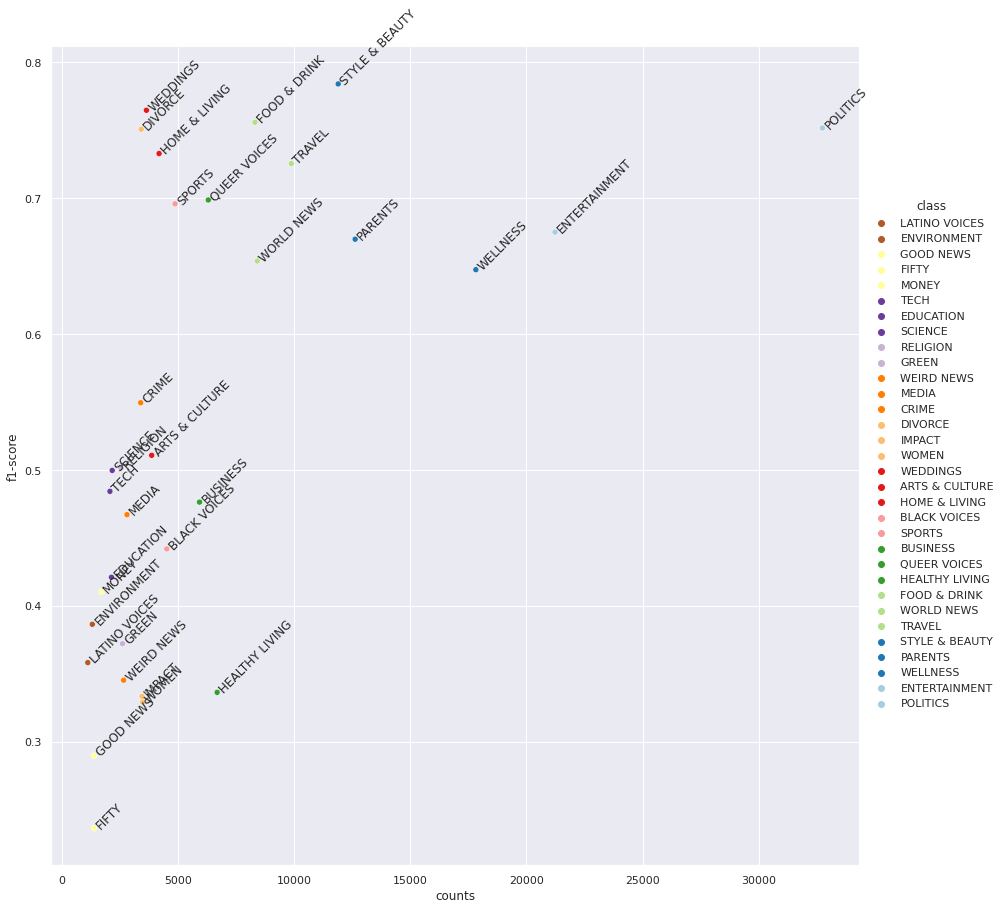

In [22]:

plot_pairs_value(case_1_result_log_reg)

As we can see there is a samll correlation, but not something we can build on an analysis. In general the very small classes get low f1 score, the bigger the class the score get a bit bigger. But most of the classes are small compared to some outlayer classes like **Politics, Entertanement and Wellnes**

Even though we can see some clustering hapeining at the scater of the points. There is 2 to 3 groups of clusters. For the 2 groups, the big difference is in f1 score. Group 1 is under 0.56. An the other is below 0.65. I's ineresting that the size of the classter didn't play a role in the good score those claster got.

But I can theorise by looking the class memner differences.


*   In the lower group the class tend to have shallow deffinition. Like **Good News** and **Weird News**,   at the end both are new and a good news can be weird also. Same case with **Tech** and **Science** may intertcollid, cause tech involve a lot time science and vis versa. In the case of **Envirement** and **Green** can represent same class, so maybe it's better to merge them in one class. So some of this class are not well classified is beacuse it collide with other class, or may represente same thing.
*   In the upper group class are well deffined and clear. liek **Sport**, **Divorce**, **Politics**, those cannot intercollinde with each other. And dp not represent same thing, the model can easay indentify them.




In [23]:
case_1_result_log_reg[['f1-score', 'counts']][:-5].corr()


,f1-score,counts
f1-score,1.000000,0.548082
counts,0.548082,1.000000


From the correlation we can see that model has the same average values around **55**. Mean that the size of the class is partially correlated with it's f1 score.


## NAIVE BAYES



We load the resul for the **naive bayes model**, then we will proced with the analysis.

In [24]:
case_1_result_nb = get_scores_table('CASE_1/pred_class_case_1_split_1_nb.csv')

In [25]:
case_1_result_nb

,precision,recall,f1-score,support,class
ARTS & CULTURE,0.250219,0.738342,0.373770,386.000000,ARTS & CULTURE
BLACK VOICES,0.177160,0.611111,0.274688,396.000000,BLACK VOICES
BUSINESS,0.393277,0.506494,0.442763,1386.000000,BUSINESS
CRIME,0.494549,0.607056,0.545057,822.000000,CRIME
DIVORCE,0.463532,0.856383,0.601494,564.000000,DIVORCE
EDUCATION,0.108108,0.581197,0.182306,117.000000,EDUCATION
ENTERTAINMENT,0.762280,0.562565,0.647369,8607.000000,ENTERTAINMENT
ENVIRONMENT,0.084399,0.868421,0.153846,38.000000,ENVIRONMENT
FIFTY,0.004831,0.666667,0.009592,3.000000,FIFTY
FOOD & DRINK,0.783918,0.745198,0.764068,2551.000000,FOOD & DRINK


#### GENERAL VIEW

We see that in general, that naive bayes got lwer scores that, logistic trgression. In all scores. the accuracy is **60**, but the **f1 score** is lowe a lot esspecially in **maco average** where it got only **40**, but in the **mirco** it got **60**, an average value , not really bad, but it's slitly, low compared to logistic regression .that mean it have low score in there a lot small classes, we will see in the ploting. 

Also kappa score is alos low at **0.56** wicth it means the model has a **moderate** reliability.  

#### INSIDER VIEW

In [26]:
#case_1_resucase_1_result_log_reglt_log_reg[:-5]['f1-score']
case_1_result_nb['counts'] = case_1_data_set_count['counts']
case_1_result_nb

,precision,recall,f1-score,support,class,counts
ARTS & CULTURE,0.250219,0.738342,0.373770,386.000000,ARTS & CULTURE,3878.0
BLACK VOICES,0.177160,0.611111,0.274688,396.000000,BLACK VOICES,4528.0
BUSINESS,0.393277,0.506494,0.442763,1386.000000,BUSINESS,5937.0
CRIME,0.494549,0.607056,0.545057,822.000000,CRIME,3405.0
DIVORCE,0.463532,0.856383,0.601494,564.000000,DIVORCE,3426.0
EDUCATION,0.108108,0.581197,0.182306,117.000000,EDUCATION,2148.0
ENTERTAINMENT,0.762280,0.562565,0.647369,8607.000000,ENTERTAINMENT,21233.0
ENVIRONMENT,0.084399,0.868421,0.153846,38.000000,ENVIRONMENT,1323.0
FIFTY,0.004831,0.666667,0.009592,3.000000,FIFTY,1401.0
FOOD & DRINK,0.783918,0.745198,0.764068,2551.000000,FOOD & DRINK,8322.0


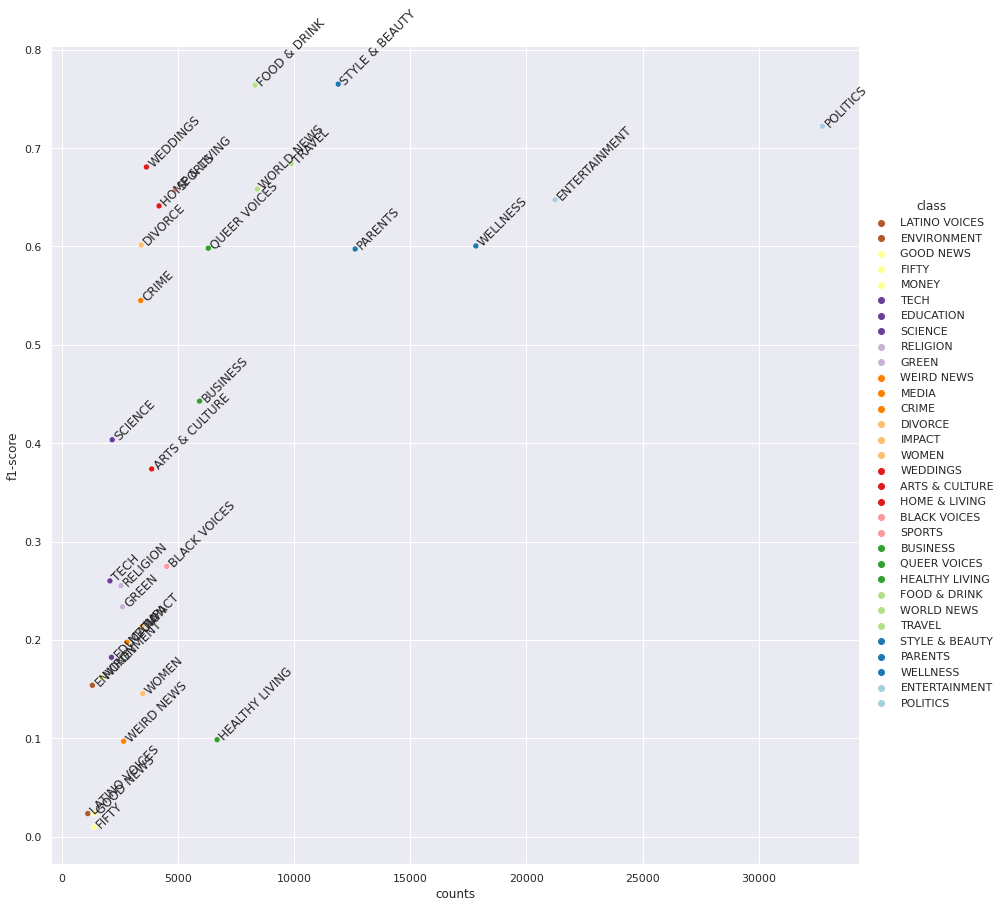

In [27]:

plot_pairs_value(case_1_result_nb)

For the analysis of the graph, it has the same characteristic of the graph of th logistic regression, there are some emerging groups. The scatter of the classes are abit different but the general trend is still spresent. the **shallow** classes with low score, and the **clear** classes with good score.

In [28]:
case_1_result_nb[['f1-score', 'counts']][:-5].corr()


,f1-score,counts
f1-score,1.000000,0.591007
counts,0.591007,1.000000


The naive bayse have better correlation between it's classification and the size of the classes. Still not substantial one, but it;s better that Logistic Regression.


## SUPPORT VECTOR MACHINES



We load the resul for the **support vector machine model**, then we will proced with the analysis.

In [29]:
case_1_result_svm = get_scores_table('CASE_1/pred_class_case_1_split_1_svm.csv')

In [30]:
case_1_result_svm

,precision,recall,f1-score,support,class
ARTS & CULTURE,0.422300,0.492323,0.454631,977.000000,ARTS & CULTURE
BLACK VOICES,0.383602,0.419872,0.400918,1248.000000,BLACK VOICES
BUSINESS,0.400000,0.407534,0.403732,1752.000000,BUSINESS
CRIME,0.489594,0.492032,0.490810,1004.000000,CRIME
DIVORCE,0.689060,0.737166,0.712302,974.000000,DIVORCE
EDUCATION,0.332273,0.337097,0.334668,620.000000,EDUCATION
ENTERTAINMENT,0.672387,0.629013,0.649977,6790.000000,ENTERTAINMENT
ENVIRONMENT,0.258312,0.397638,0.313178,254.000000,ENVIRONMENT
FIFTY,0.202899,0.235955,0.218182,356.000000,FIFTY
FOOD & DRINK,0.740206,0.699532,0.719295,2566.000000,FOOD & DRINK


#### GENERAL VIEW

We see that in general, that svm got lower scores that, logistic trgression. But better a bit brom naive bays in all scores. the accuracy is **60**, but the **f1 score macro** got **48** better that naive bayse, but less than logistic regression. Still a big gape between it and **micro f1 score**, so the small classes are also not well classes.

Also kappa score is also low  like naive bayse at **0.56** wicth it means the model has a **moderate** reliability.  

#### INSIDER VIEW

In [31]:
#case_1_resucase_1_result_log_reglt_log_reg[:-5]['f1-score']
case_1_result_svm['counts'] = case_1_data_set_count['counts']
case_1_result_svm

,precision,recall,f1-score,support,class,counts
ARTS & CULTURE,0.422300,0.492323,0.454631,977.000000,ARTS & CULTURE,3878.0
BLACK VOICES,0.383602,0.419872,0.400918,1248.000000,BLACK VOICES,4528.0
BUSINESS,0.400000,0.407534,0.403732,1752.000000,BUSINESS,5937.0
CRIME,0.489594,0.492032,0.490810,1004.000000,CRIME,3405.0
DIVORCE,0.689060,0.737166,0.712302,974.000000,DIVORCE,3426.0
EDUCATION,0.332273,0.337097,0.334668,620.000000,EDUCATION,2148.0
ENTERTAINMENT,0.672387,0.629013,0.649977,6790.000000,ENTERTAINMENT,21233.0
ENVIRONMENT,0.258312,0.397638,0.313178,254.000000,ENVIRONMENT,1323.0
FIFTY,0.202899,0.235955,0.218182,356.000000,FIFTY,1401.0
FOOD & DRINK,0.740206,0.699532,0.719295,2566.000000,FOOD & DRINK,8322.0


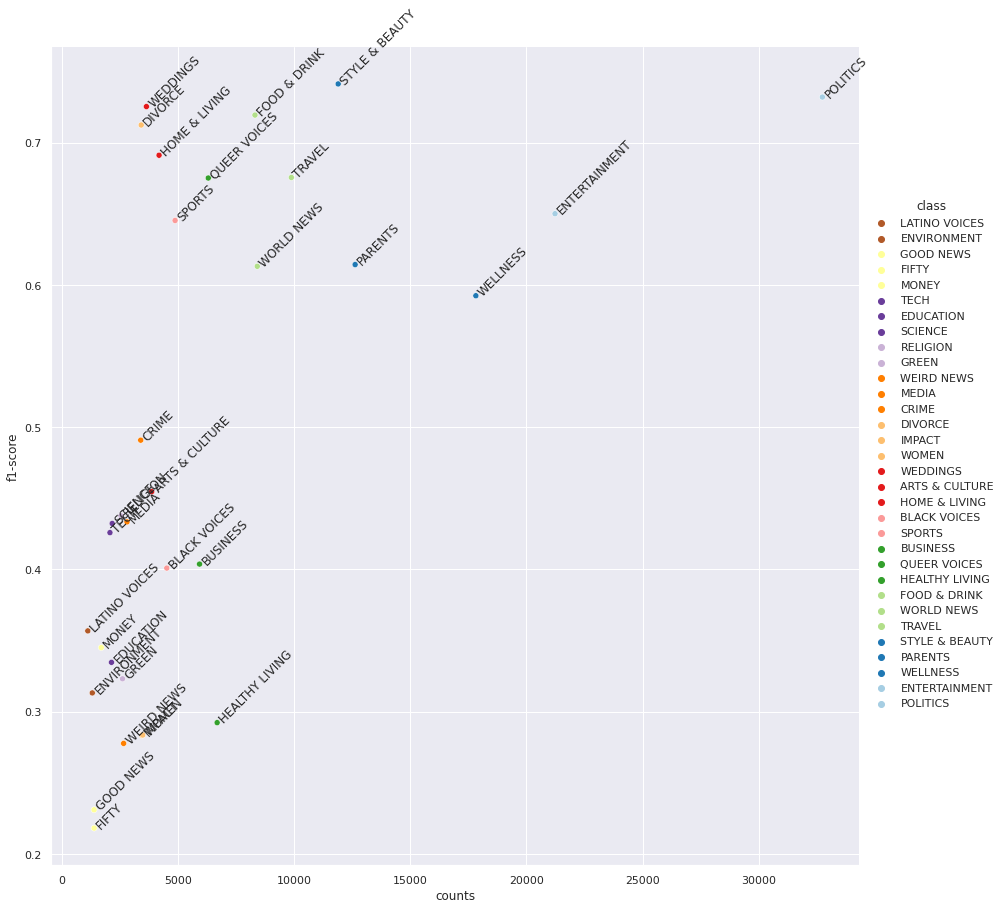

In [32]:

plot_pairs_value(case_1_result_svm)


We still have two distinct groups and even clearer. The size of the class didn't play a the critical role in the classification performance for the classes, because it exists small groups with good scores.

*   Upper Group: still the same from other models. It contains classes with clear and foced identity. 
*   lower Group: same like in the other models. It contains small classes, and these class tend to have a vaste indentity, and even intersect with other classes or have same meaning.

But it clear that the bigger classes, lie **politics, Wellness, Entertainement ..** are well classed and the smallest classes, like **Fifty, good News, women** are not well classed, so the size also play a role in this case.


In [33]:
case_1_result_svm[['f1-score', 'counts']][:-5].corr()


,f1-score,counts
f1-score,1.000000,0.566679
counts,0.566679,1.000000


We have the same correlation like some other model, we can say that the size play a role in the quality of the classification, but not a critical role. There are other variable related to the identity of same classes.



## RANDOM FORRET



We load the resul for the **random forrest model**, then we will proced with the analysis.

In [34]:
case_1_result_rf = get_scores_table('CASE_1/pred_class_case_1_split_1_rf.csv')

In [35]:
case_1_result_rf

,precision,recall,f1-score,support,class
ARTS & CULTURE,0.311677,0.572581,0.403638,620.000000,ARTS & CULTURE
BLACK VOICES,0.215959,0.553471,0.310690,533.000000,BLACK VOICES
BUSINESS,0.374790,0.445406,0.407058,1502.000000,BUSINESS
CRIME,0.443013,0.492291,0.466354,908.000000,CRIME
DIVORCE,0.597889,0.846467,0.700787,736.000000,DIVORCE
EDUCATION,0.346582,0.406716,0.374249,536.000000,EDUCATION
ENTERTAINMENT,0.721033,0.476934,0.574115,9603.000000,ENTERTAINMENT
ENVIRONMENT,0.107417,0.954545,0.193103,44.000000,ENVIRONMENT
FIFTY,0.048309,0.392157,0.086022,51.000000,FIFTY
FOOD & DRINK,0.757938,0.614305,0.678604,2992.000000,FOOD & DRINK


#### GENERAL VIEW

The random forrest have a result near those from naive bayse, but with minor variation, the trick is that is model took a long time to train. Longer that most of them, but manage to get lower values from logistic regression.

Also kappa score is also low at **0.54** wicth it means the model has a **moderate** reliability.  

In general we can not recomand this model, at least for the time it takes to train.


#### INSIDER VIEW

In [36]:
#case_1_resucase_1_result_log_reglt_log_reg[:-5]['f1-score']
case_1_result_rf['counts'] = case_1_data_set_count['counts']
case_1_result_rf

,precision,recall,f1-score,support,class,counts
ARTS & CULTURE,0.311677,0.572581,0.403638,620.000000,ARTS & CULTURE,3878.0
BLACK VOICES,0.215959,0.553471,0.310690,533.000000,BLACK VOICES,4528.0
BUSINESS,0.374790,0.445406,0.407058,1502.000000,BUSINESS,5937.0
CRIME,0.443013,0.492291,0.466354,908.000000,CRIME,3405.0
DIVORCE,0.597889,0.846467,0.700787,736.000000,DIVORCE,3426.0
EDUCATION,0.346582,0.406716,0.374249,536.000000,EDUCATION,2148.0
ENTERTAINMENT,0.721033,0.476934,0.574115,9603.000000,ENTERTAINMENT,21233.0
ENVIRONMENT,0.107417,0.954545,0.193103,44.000000,ENVIRONMENT,1323.0
FIFTY,0.048309,0.392157,0.086022,51.000000,FIFTY,1401.0
FOOD & DRINK,0.757938,0.614305,0.678604,2992.000000,FOOD & DRINK,8322.0


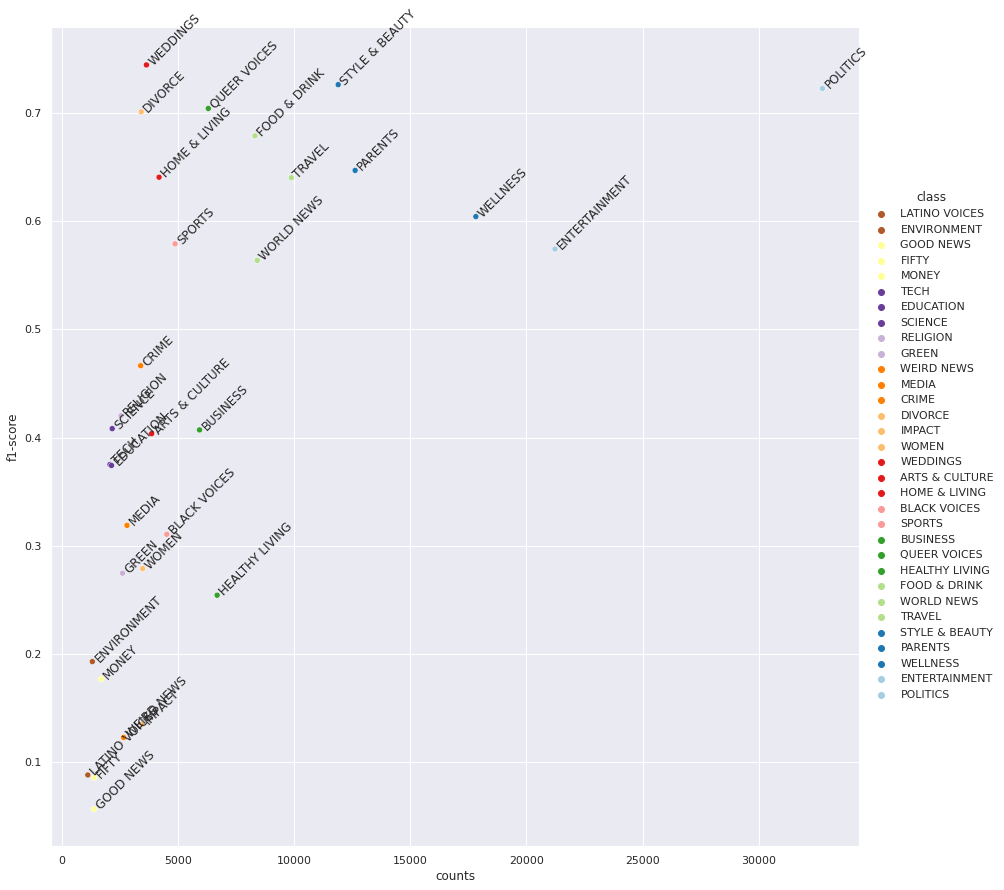

In [37]:

plot_pairs_value(case_1_result_rf)


It's the same trend, we don't have anything to add. there stil the same class, and the size still have a moderate role in total classification.

In [38]:
case_1_result_rf[['f1-score', 'counts']][:-5].corr()


,f1-score,counts
f1-score,1.000000,0.558933
counts,0.558933,1.000000


We have the same correlation like some other model, we can say that the size play a role in the quality of the classification, but not a critical role. There are other variable related to the identity of same classes.


## BERT




We load the resul for the **naive bayes model**, then we will proced with the analysis.

In [39]:
case_1_result_bert = get_scores_table('CASE_1/pred_class_case_1_split_2_bert.csv')

In [40]:
case_1_result_bert

,precision,recall,f1-score,support,class
ARTS & CULTURE,0.548291,0.461732,0.501302,4377.000000,ARTS & CULTURE
BLACK VOICES,0.322331,0.510378,0.395122,2698.000000,BLACK VOICES
BUSINESS,0.545827,0.469678,0.504898,6530.000000,BUSINESS
CRIME,0.590699,0.575976,0.583245,3330.000000,CRIME
DIVORCE,0.749692,0.809049,0.778240,3006.000000,DIVORCE
EDUCATION,0.555500,0.476818,0.513161,2351.000000,EDUCATION
ENTERTAINMENT,0.745592,0.672967,0.707421,22432.000000,ENTERTAINMENT
ENVIRONMENT,0.029412,0.381443,0.054613,97.000000,ENVIRONMENT
FIFTY,0.009782,0.342105,0.019020,38.000000,FIFTY
FOOD & DRINK,0.818009,0.799703,0.808753,8088.000000,FOOD & DRINK


#### GENERAL VIEW

BERT tend to have better than all models we have, got **accuracy** of **0.67** and **macro f1 score** of **0.53** like logistic regression, but for **micro** we got **0.67**, the best till now. There still a big gap between the mocro and macro values. Bit in general those value are moderete if we want t count on the model in real production envirement. Th

Also kappa score is alos low at **0.64** wicth it means the model **substantial** reliability, and it's the best aong all the models.


#### INSIDER VIEW

In [41]:
#case_1_resucase_1_result_log_reglt_log_reg[:-5]['f1-score']
case_1_result_bert['counts'] = case_1_data_set_count['counts']
case_1_result_bert

,precision,recall,f1-score,support,class,counts
ARTS & CULTURE,0.548291,0.461732,0.501302,4377.000000,ARTS & CULTURE,3878.0
BLACK VOICES,0.322331,0.510378,0.395122,2698.000000,BLACK VOICES,4528.0
BUSINESS,0.545827,0.469678,0.504898,6530.000000,BUSINESS,5937.0
CRIME,0.590699,0.575976,0.583245,3330.000000,CRIME,3405.0
DIVORCE,0.749692,0.809049,0.778240,3006.000000,DIVORCE,3426.0
EDUCATION,0.555500,0.476818,0.513161,2351.000000,EDUCATION,2148.0
ENTERTAINMENT,0.745592,0.672967,0.707421,22432.000000,ENTERTAINMENT,21233.0
ENVIRONMENT,0.029412,0.381443,0.054613,97.000000,ENVIRONMENT,1323.0
FIFTY,0.009782,0.342105,0.019020,38.000000,FIFTY,1401.0
FOOD & DRINK,0.818009,0.799703,0.808753,8088.000000,FOOD & DRINK,8322.0


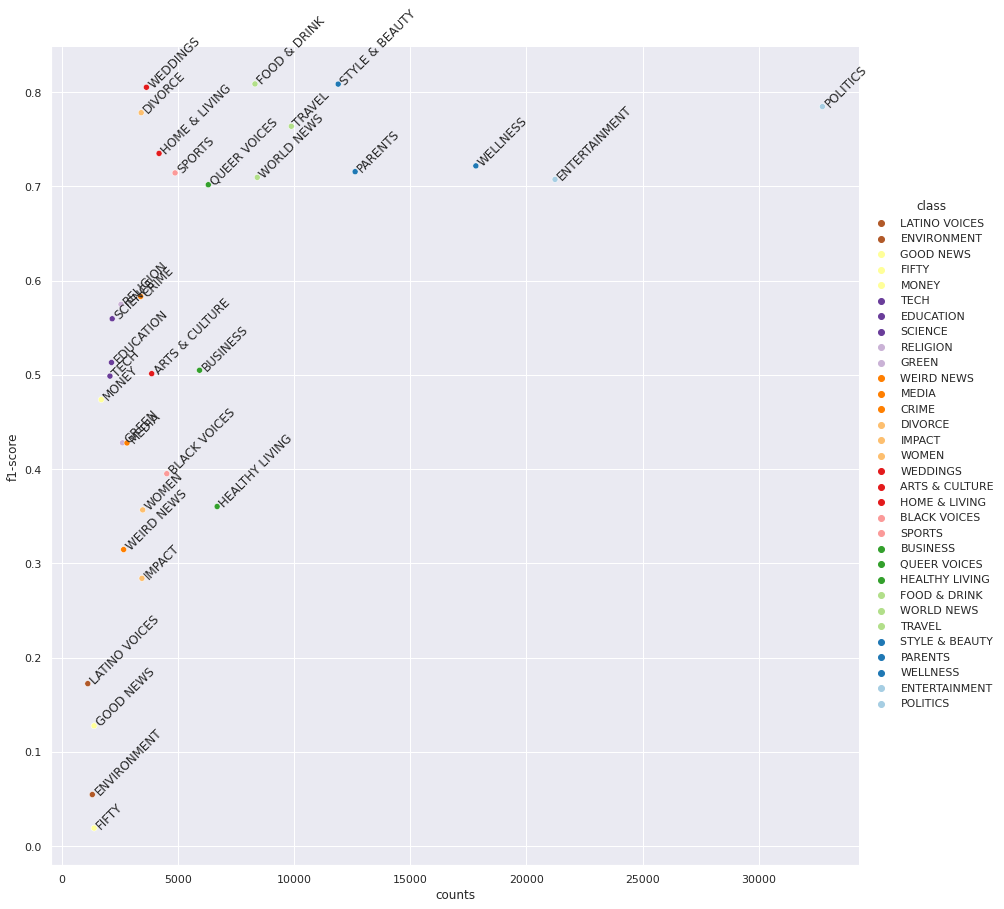

In [42]:

#plot.savefig("case_1_result_bert.png")
#plot

plot_pairs_value(case_1_result_bert)


In bert we can see the emergence of groups but this time we can see that there is some three groups not two. In variaton of score. This trend has bben seen in random forest but we thought it's not important because of the low result over all. We guess that the two important parmas that play the role in this distribution is the **size of the class** and the **clarity of identity of the class**.



*   Lower Group : member classes have samll size and low clarity in identity, so they end up at the buttom of the quality of classification.
*   Middle Group : member have a small size and midium clarity of identity.
*   Upper Group : members may have small or big sizes, but have a **clear identity**

So in general the good the definition of the classs the better the classification. But a good size contribute a bit.








In [43]:
case_1_result_bert[['f1-score', 'counts']][:-5].corr()


,f1-score,counts
f1-score,1.000000,0.528687
counts,0.528687,1.000000


We still have a moderate role of the size, even in the **BERT** model.


## FINAL COMPARISION OF CASE 1



In [44]:
#!pip install seaborn==0.11.0



preparing the final scores tables.

In [48]:
case_1_scores = case_1_result_log_reg[-5:].transpose().head(0)

case_1_scores = add_model_to_case(case_1_scores, case_1_result_log_reg, 5, 'log_reg')
case_1_scores = add_model_to_case(case_1_scores, case_1_result_nb, 5, 'nb')
case_1_scores = add_model_to_case(case_1_scores, case_1_result_svm, 5, 'svm')
case_1_scores = add_model_to_case(case_1_scores, case_1_result_rf, 5, 'rf')
case_1_scores = add_model_to_case(case_1_scores, case_1_result_bert, 5, 'bert')

case_1_scores

,accuracy,macro avg,weighted avg,micro avg,kappa,model
0,0.637696,0.504324,0.660645,0.637696,0.60879,log_reg
0,0.598961,0.36357,0.751555,0.598961,0.559988,nb
0,0.591941,0.47456,0.600162,0.591941,0.561346,svm
0,0.579876,0.392805,0.659933,0.579876,0.541795,rf
0,0.669516,0.522643,0.705504,0.669516,0.644356,bert


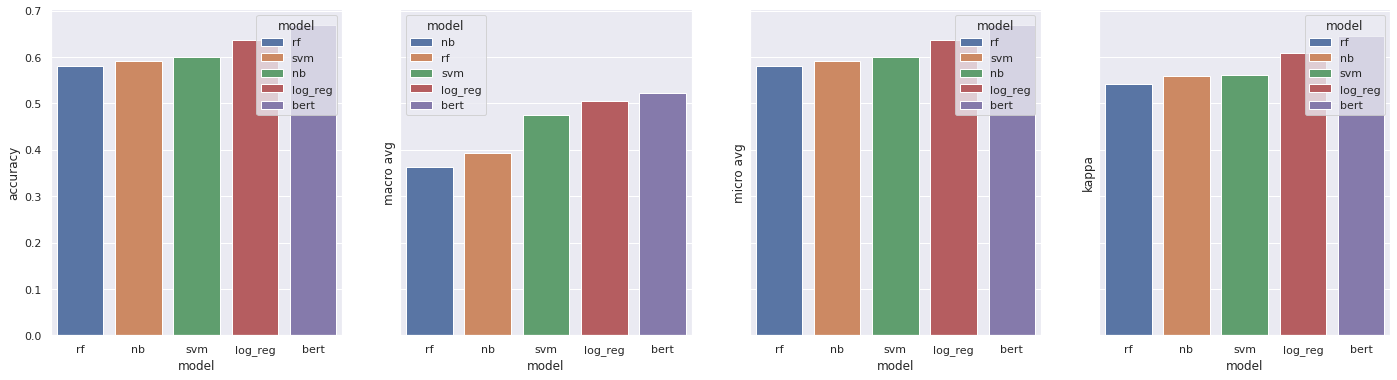

In [82]:

sns.set_theme(style="whitegrid")

sns.set(rc={'figure.figsize':(10, 10)})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(24, 6), ncols=4, sharex=True, sharey=True)
sns.barplot(x="model", y="accuracy", hue="model", data=case_1_scores.sort_values(by='accuracy'), ax = ax1, dodge=False)
sns.barplot(x="model", y="macro avg", hue="model", data=case_1_scores.sort_values(by='macro avg'), ax = ax2, dodge=False)
sns.barplot(x="model", y="micro avg", hue="model", data=case_1_scores.sort_values(by='micro avg'), ax = ax3, dodge=False)
sns.barplot(x="model", y="kappa", hue="model", data=case_1_scores.sort_values(by='kappa'), ax = ax4, dodge=False)


plt.show()